In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import the data from medical_examination.csv and assign it to the df variable.

In [3]:
df=pd.read_csv("/workspaces/Medical-Data-Visualizer/medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##### 2.Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [16]:
df['overweight']=df['weight']/((df['height']/100)**2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,overweight1
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [17]:
df['overweight']=[ 1 if i>25 else 0 for i in df['overweight']]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,overweight1
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0


##### 3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [22]:
df['cholesterol']=[0 if i==1 else 1 for i in df['cholesterol']]
df.head()
df['gluc']=[0 if j==1 else 1 for j in df['gluc']]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,overweight1
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,0


#### 3.Draw the Categorical Plot in the draw_cat_plot function.

In [24]:
df_cat = pd.melt(df, id_vars=['cardio'],
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [25]:


df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
df_cat



,cardio,variable,value,0
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,4127
7,0,gluc,1,30894
8,0,overweight,0,15915
9,0,overweight,1,19106


In [26]:
df_cat = df_cat.rename(columns={0: 'total'})
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,4127
7,0,gluc,1,30894
8,0,overweight,0,15915
9,0,overweight,1,19106


### 7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().

### 10. Draw the Heat Map in the draw_heat_map function.

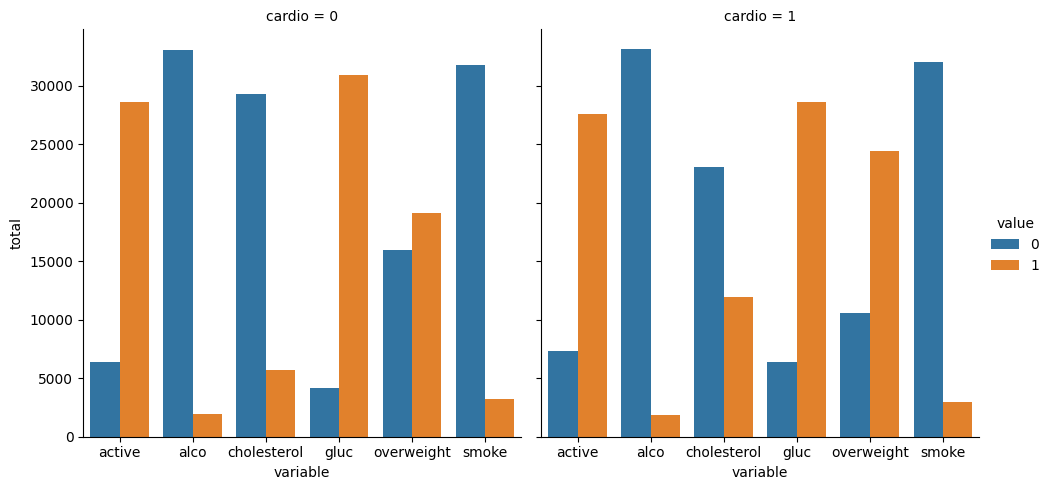

In [ ]:

graph = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
fig = graph.fig





##### 11. Clean the data. Filter out the following patient segments that represent incorrect data: diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi'])) height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025))) height is more than the 97.5th percentile weight is less than the 2.5th percentile weight is more than the 97.5th percentile Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.


In [28]:


df_heat =  df[(df['ap_lo'] <= df['ap_hi']) &
              (df['height'] >= df['height'].quantile(0.025)) &
              (df['height'] <= df['height'].quantile(0.975)) &
              (df['weight'] >= df['weight'].quantile(0.025)) &
              (df['weight'] <= df['weight'].quantile(0.975))
             ]
df_heat



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,overweight1
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,1,0,0,1,1,0,0
69994,99992,21074,1,165,80.0,150,80,0,1,0,0,1,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1,1


### 12. Calculate the correlation matrix and store it in the corr variable.

In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,overweight1
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,-0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,-0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,-0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,-0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,-0.074840,0.023275,0.033042,0.001569,0.327181,0.172212,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,-0.383743,0.012680,0.038446,0.002494,0.203467,0.127986,0.127986
gluc,-0.002289,-0.086990,0.021357,0.030469,-0.107072,-0.011111,-0.074840,-0.383743,1.000000,0.004157,-0.014297,0.010145,-0.088445,-0.088109,-0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274,-0.003274


##### 13.Generate a mask for the upper triangle and store it in the mask variable.

In [30]:


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask



array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

### 14.Set up the matplotlib figure.

<Axes: >

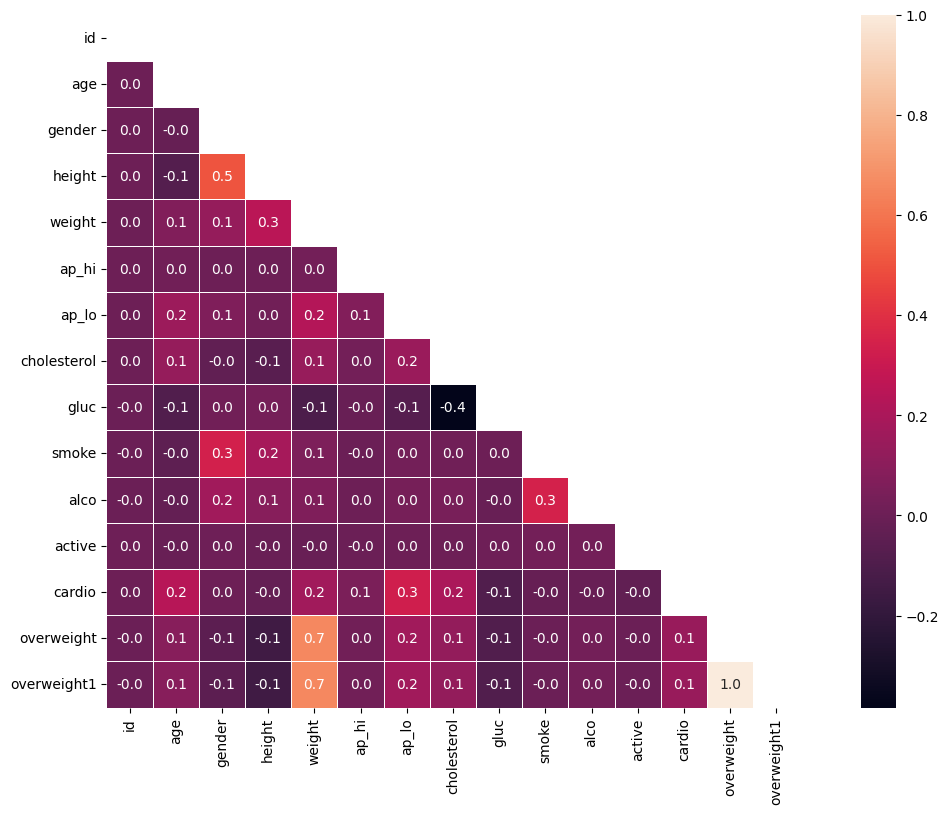

In [31]:


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

